In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv("sample_data/mnist_train_small.csv")
datavalues = df.values
data = datavalues[:,1:]
labels = datavalues[:,0:1]

scaler = MinMaxScaler()
model = scaler.fit(data)
dataNormalized = model.transform(data)

dataNormalized = torch.tensor(data).float()
labels = torch.tensor(labels).long()

X_train, X_test, y_train, y_test = train_test_split(dataNormalized, labels, test_size=0.1)

training_dataset = TensorDataset(X_train,y_train)
testing_dataset = TensorDataset(X_test,y_test)

batchsize = 32
train_loader = DataLoader(training_dataset, batch_size=batchsize, shuffle=True,drop_last=True)
test_loader = DataLoader(testing_dataset, batch_size=testing_dataset.tensors[0].shape[0])





In [14]:
class AnnModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(784,64)
    self.hidden1 = nn.Linear(64,32)
    self.hidden2 = nn.Linear(32,32)
    self.output = nn.Linear(32,10)

  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = self.output(x)
    return x

In [15]:
ANN = AnnModel()
loss_function = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(ANN.parameters(), lr=learning_rate)
epoch = 50

epochLoss = []

for epochi in range(50):
  batchLoss = []
  for X,y in train_loader:
    pred = ANN(X)
    loss = loss_function(pred,y.flatten().long())
    batchLoss.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  epochLoss.append(torch.mean(torch.tensor(batchLoss)))




tensor(95.3500)


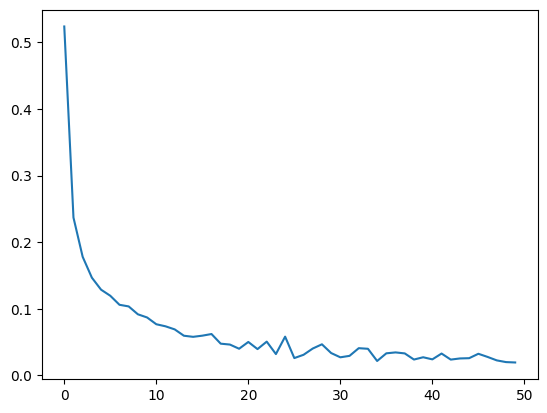

In [16]:

X = list(test_loader)[0][0]
y = list(test_loader)[0][1]
prediction = ANN(X)
matches = (torch.argmax(prediction,axis=1) == y.flatten()).float()
acc = 100*torch.mean(matches)
print(acc.detach())
plt.plot(epochLoss)
